In [ ]:
# Code snippet 0
# Import the Libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from tensorflow import random

In [ ]:
# Code snippet 1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Code snippet 2
#  Configuring the Neural Network to absorb the images
seed = 1
np.random.seed(seed)
random.set_seed(seed)

# Initialising the CNN
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Add additional convolutional layer and pooling
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
classifier.add(Flatten())

# Full ANN Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Normalize the image data

In [ ]:
# Code snippet 3
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

Assigning training and test data sets

In [ ]:
# Code snippet 4
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Image Classification/chest_xray/train_images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Image Classification/chest_xray/val_images',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5225 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Fit the model to the training data

In [ ]:
# Code snippet 5
classifier.fit_generator(training_set,
                         epochs = 1,
                         validation_data = test_set
                        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


164/164 [==============================] - 1218s 7s/step - loss: 0.4204 - accuracy: 0.8132 - val_loss: 0.5888 - val_accuracy: 0.6250


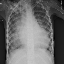

In [ ]:
# Code snippet 6 - SELECT an IMAGE from the Test or validation images folder
# Load a new image for testing the AI program
from keras.preprocessing import image
new_image = image.load_img('/content/drive/MyDrive/Image Classification/chest_xray/train_images/PNEUMONIA/person1003_bacteria_2934.jpeg', target_size = (64, 64))
new_image

In [ ]:
# Code snippet 7
# Class names
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Print the results

In [ ]:
# Code snippet 8
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)
result
result[0][0]

0.84065443

In [ ]:
# Code snippet 9
if result[0][0] > 0.5:
    prediction = 'This X ray shows PNEUMONIA'
else:
    prediction = 'This X ray is NORMAL'
print(prediction)

This X ray shows PNEUMONIA
